### L21: Applying Sobel:
#### My Solution

In [1]:
# for local notebook, as oppsoed to running online
%matplotlib inline

returning sobelx binary..


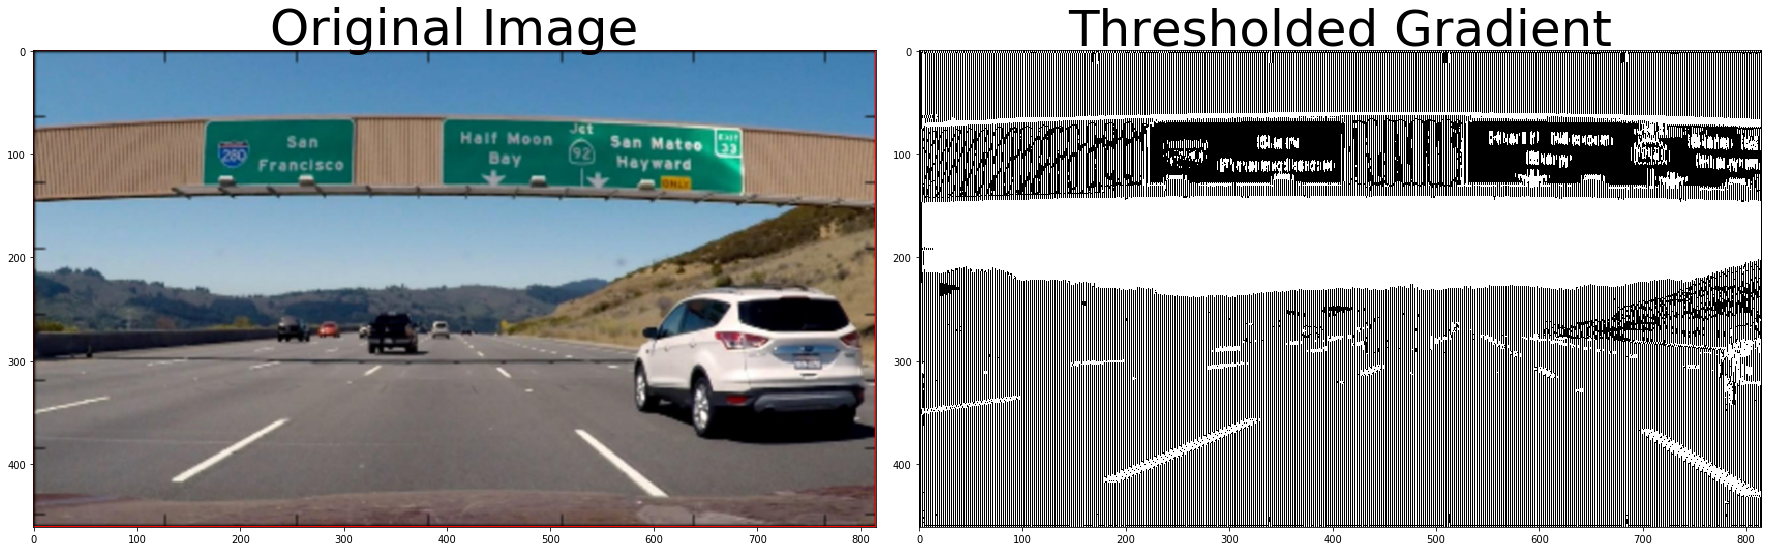

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image and grayscale it
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.

def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Sobel requires a grayscale image.
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)  # 1, 0 = x dir = vertical emphasis
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)  # 0, 1 = y dir = horizontal emphasis
    
    # 3) Take the absolute value of the derivative or gradient
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_abs_sobelx = np.uint8(255 * abs_sobelx/np.max(abs_sobelx))
    scaled_abs_sobely = np.uint8(255 * abs_sobely/np.max(abs_sobely))
    
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    threshold_min =   5 #5 #20
    threshold_max = 100
    
    # init binary image: create a black "zeroed out" image
    sx_binary = np.zeros_like(scaled_abs_sobelx)
    sy_binary = np.zeros_like(scaled_abs_sobely)
    
    # create binary image: set==1 the pixels from scaled sobel which are within threshold values
    sx_binary[ (scaled_abs_sobelx >= threshold_min) & (scaled_abs_sobelx <= threshold_max)] = 1
    sy_binary[ (scaled_abs_sobely >= threshold_min) & (scaled_abs_sobely <= threshold_max)] = 1
        
    # 6) Return this mask as your binary_output image
    #  binary_output = np.copy(img) # Remove this line
    #  return binary_output
        
    if orient == 'x':
        print('returning sobelx binary..')
        return sx_binary
    elif orient == 'y':
        print('returning sobely binary..')
        return sy_binary
    else:
        print('orientation must be "x" or "y"; returning grayscale')
        return gray
    
# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### ReadMe: Applying Sobel, Quiz
Here's your chance to write a function that will be useful for the Advanced Lane-Finding Project at the end of this lesson! Your goal in this exercise is to identify pixels where the gradient of an image falls within a specified threshold range.  

Example  
<img src='l21-sobel-thresh-x-example.png' />  

Here's the scaffolding for your function:  
```
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):  
    # Grayscale  
    # Apply cv2.Sobel()  
    # Take the absolute value of the output from cv2.Sobel()  
    # Scale the result to an 8-bit range (0-255)  
    # Apply lower and upper thresholds  
    # Create binary_output  
    return binary_output  
```    
Pass in `img` and set the parameter orient as '` x `' or '` y `' to take either the x or y gradient.  
Set `min_thresh`, and `max_thresh` to specify the range to select for binary output.  
You can use exclusive (` < `, ` > `) or inclusive (` <= `, ` >= `) thresholding.  

NOTE: Your output should be an array of the same size as the input image.  
The output array elements should be ` 1 ` where gradients were in the threshold range, and ` 0 ` everywhere else.  

As usual, if you run into any errors as you run your code, please refer to the  
Examples of Useful Code section in the previous video and make sure that your code syntax matches up!  

### Examples of Useful Code 

#### Sobel Operator  
The Sobel operator is at the heart of the Canny edge detection algorithm you used in the Introductory Lesson. Applying the Sobel operator to an image is a way of taking the derivative of the image in the x or y direction. The operators for `Sobel  ​x  ​​` and `Sobel  ​y  ​​` , respectively, look like this:  
<img src='l21-soble-operator.png' />

These are examples of Sobel operators with a kernel size of 3 (implying a 3 x 3 operator in each case). This is the minimum size, but the kernel size can be any odd number. A larger kernel implies taking the gradient over a larger region of the image, or, in other words, a smoother gradient.  

To understand how these operators take the derivative, you can think of overlaying either one on a 3 x 3 region of an image. If the image is flat across that region, then the result (summing the element-wise product of the operator and corresponding image pixels) will be zero. If, instead, for example, you apply the `S  ​x  ​​ ` operator to a region of the image where values are rising from left to right, then the result will be positive, implying a positive derivative.  

Derivative Example  
If we apply the Sobel x and y operators to this image: 
<img src='l21-curved-lane.jpg' /> 

And then we take the absolute value, we get the result:  
Absolute value of Sobel x (left) and Sobel y (right).   x vs. y  
 <img src='l21-sobelx-vs-sobely.png' />
Absolute value of Sobel x (left) and Sobel y (right).   

In the above images, you can see that the gradients taken in both the x and the y directions detect the lane lines and pick up other edges.  
Taking the gradient in the **x** direction emphasizes edges closer to **vertical**.  
Alternatively, taking the gradient in the **y** direction emphasizes edges closer to **horizontal**.  

In the upcoming exercises, you'll write functions to take various thresholds of the x and y gradients.  
Here's some code that might be useful:  

**Examples of Useful Code**   

You need to pass a single color channel to the `cv2.Sobel()` function, so first convert it to grayscale:  
```
gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
```   

Note: Make sure you use the correct grayscale conversion depending on how you've read in your images.  
Use `cv2.COLOR_RGB2GRAY` if you've read in an image using `mpimg.imread()`.   
Use `cv2.COLOR_BGR2GRAY` if you've read in an image using `cv2.imread()`.  

Calculate the derivative in the x direction (the 1, 0 at the end denotes x direction):  
```
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
```  

Calculate the derivative in the y direction (the 0, 1 at the end denotes y direction):  
```
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
```  

Calculate the absolute value of the x derivative:  
```
abs_sobelx = np.absolute(sobelx)
```  

Convert the absolute value image to 8-bit:  
```
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
```  

Note: It's not entirely necessary to convert to 8-bit (range from 0 to 255) but in practice, it can be useful in the event that you've written a function to apply a particular threshold, and you want it to work the same on input images of different scales, like jpg vs. png.  
You could just as well choose a different standard range of values, like 0 to 1 etc.  

Create a binary threshold to select pixels based on gradient strength:\\

```
thresh_min = 20  
thresh_max = 100  
sxbinary = np.zeros_like(scaled_sobel)  
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1  
plt.imshow(sxbinary, cmap='gray')  
```
Result  
Pixels have a value of 1 or 0 based on the strength of the <span class="mathquill">x</span> gradient.  
<img src='l21-sobelx-binary.jpg' />  
Pixels have a value of 1 or 0 based on the strength of the x gradient.  




### Start file for Quiz: 


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image and grayscale it
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    # 3) Take the absolute value of the derivative or gradient
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    # 6) Return this mask as your binary_output image
    binary_output = np.copy(img) # Remove this line
    return binary_output
    
# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)